In [48]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes2.csv


> ## Formulación del problema.

#### Los datos fueron recolectados y puesto a disposición por el Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales como parte de una base de datos de diabetes de la población de indios Pima. En particular son mujeres de 21 años en adelante.

#### Se necesita realizar un algoritmo de regresión logística puesto que en un futuro se necesitará predecir si una mujer tiene diabetes o no.

> ## Recolección de datos.

In [49]:
data = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes2.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


> ## Exploración de datos.

In [50]:
data.shape

(768, 9)

In [51]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [52]:
data.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [53]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [54]:
data.duplicated().sum()

0

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [56]:
for i in data.columns.values.tolist():
    print(i)
    print(data[i].unique())
    print("\n")

Pregnancies
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]


Glucose
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]


BloodPressure
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]


SkinThickness
[35 29  0 23 32 45 19 47 38 30 41 33 26 15 36 11 31 37 42 25 18 24 39 27
 21 34 10 60 13 20 22 28 54 40 51 56 14 17 50 44 12 46 16  7 52 43 48  8
 4

In [57]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Descripción del dataset
* #### Contiene 768 filas y 9 columnas/variables, 8 variables independientes y 1 variable objetivo.
* #### Todas sus variables son númericas.
* #### No tiene valores nulos ni filas duplicadas.

> ## Análisis exploratorio de las variables.
### Variable dependiente (Outcome)

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [59]:
var_ind = data.columns.drop("Outcome").tolist()
var_ind

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [60]:
data["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [61]:
data_outcome = data.groupby("Outcome")
for col in var_ind:
    print(col)
    print(data_outcome[col].describe())
    print("\n")

Pregnancies
         count      mean       std  min   25%  50%  75%   max
Outcome                                                      
0        500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0
1        268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0


Glucose
         count        mean        std  min    25%    50%    75%    max
Outcome                                                               
0        500.0  109.980000  26.141200  0.0   93.0  107.0  125.0  197.0
1        268.0  141.257463  31.939622  0.0  119.0  140.0  167.0  199.0


BloodPressure
         count       mean        std  min   25%   50%   75%    max
Outcome                                                           
0        500.0  68.184000  18.063075  0.0  62.0  70.0  78.0  122.0
1        268.0  70.824627  21.491812  0.0  66.0  74.0  82.0  114.0


SkinThickness
         count       mean        std  min  25%   50%   75%   max
Outcome                                                         
0        500.0  

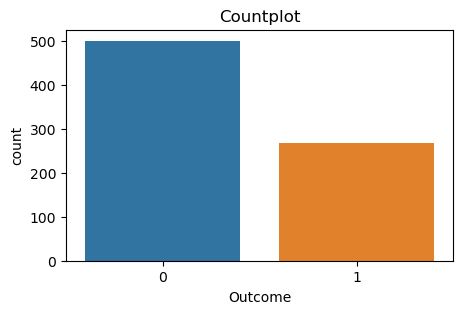

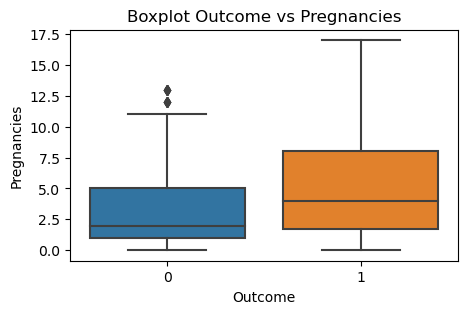

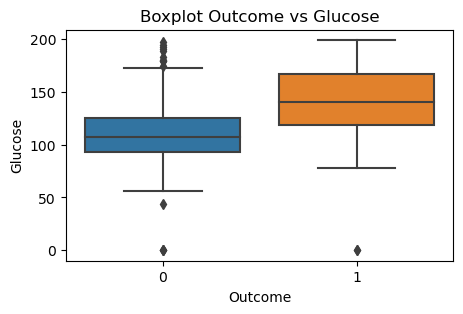

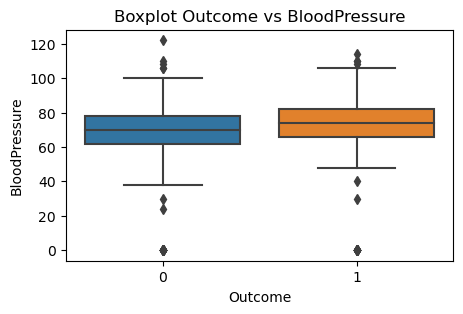

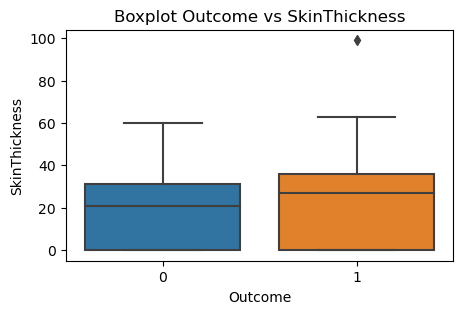

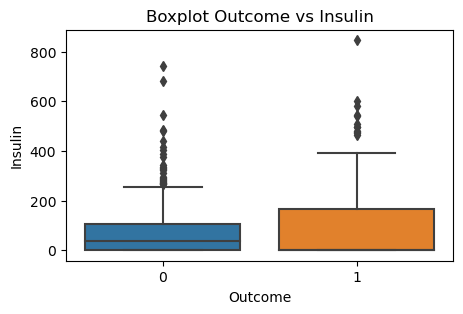

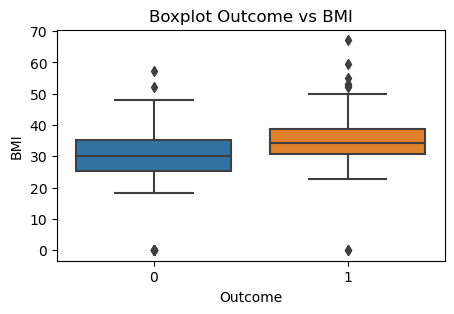

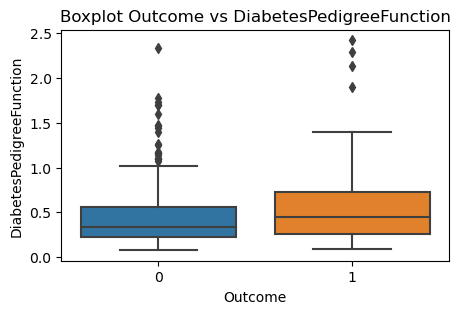

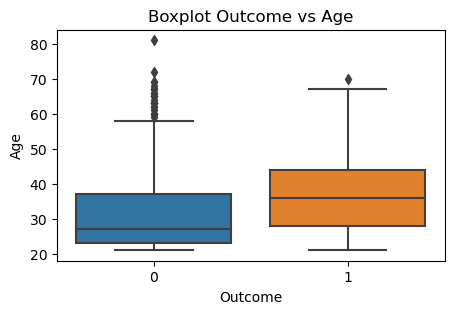

In [62]:
plt.figure(figsize=(5,3))

sns.countplot(x=data["Outcome"])
plt.title("Countplot")
plt.show()

for col in var_ind:
    plt.figure(figsize=(5,3))
    
    sns.boxplot(x=data["Outcome"],y=data[col])
    plt.title("Boxplot Outcome vs "+col)
    plt.show

### Descripción variable dependiente (Outcome).
* #### Hay 500 mujeres que no tienen diabetes y hay 268 que si tienen diabetes.
* #### La edad promedio de mujeres con diabetes es de 37 años.
* #### Las mujeres que tienen diabetes tienen en promedio 4 embarazos.  
* #### El promedio de glucosa en sangre de mujeres con diabetes es de 141 contra 110 que no tienen diabetes.
* #### El nivel promedio de insulina en mujeres con diabetes es de 100 contra 60 que no tienen diabetes.

### Variables independientes.

In [63]:
for col in var_ind:
    print(col)
    print(data[col].describe())
    print("\n")

Pregnancies
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64


Glucose
count    768.000000
mean     120.894531
std       31.972618
min        0.000000
25%       99.000000
50%      117.000000
75%      140.250000
max      199.000000
Name: Glucose, dtype: float64


BloodPressure
count    768.000000
mean      69.105469
std       19.355807
min        0.000000
25%       62.000000
50%       72.000000
75%       80.000000
max      122.000000
Name: BloodPressure, dtype: float64


SkinThickness
count    768.000000
mean      20.536458
std       15.952218
min        0.000000
25%        0.000000
50%       23.000000
75%       32.000000
max       99.000000
Name: SkinThickness, dtype: float64


Insulin
count    768.000000
mean      79.799479
std      115.244002
min        0.000000
25%        0.000000
50%       30.500000
75%      127.250000
max      846.000000


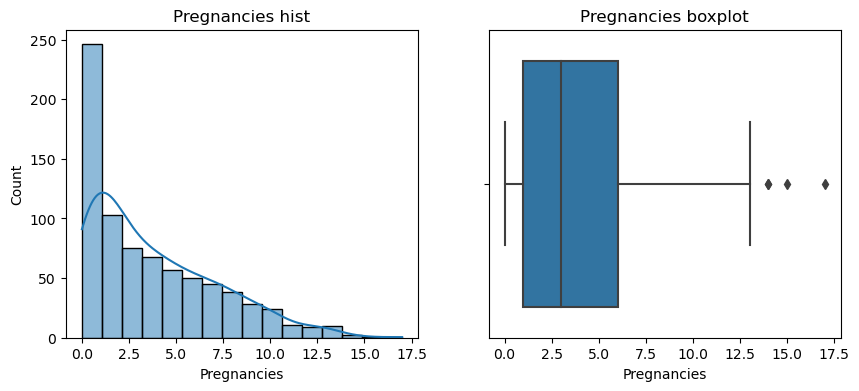

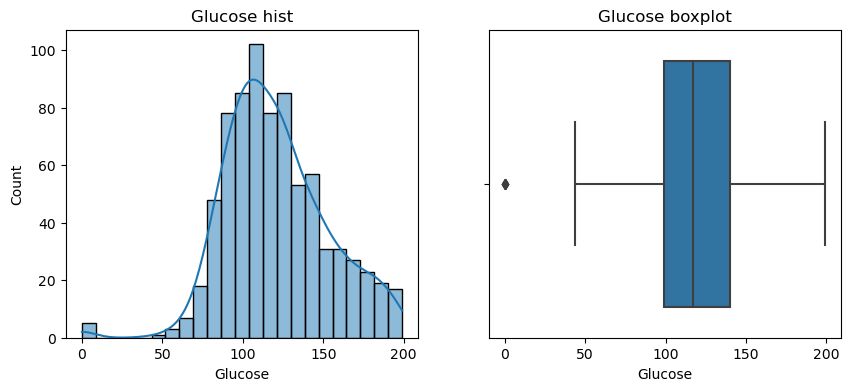

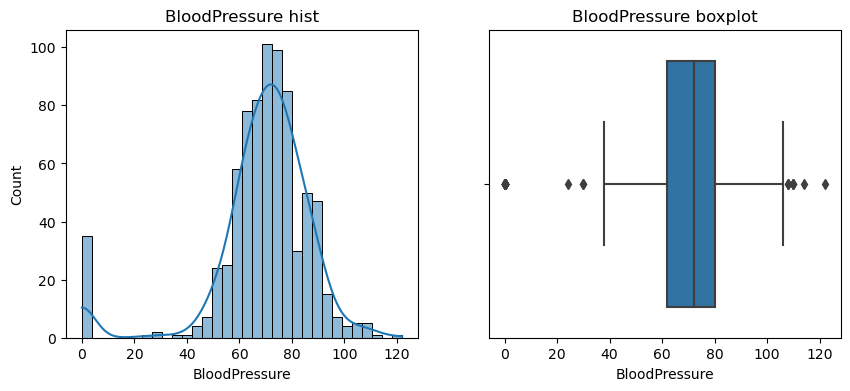

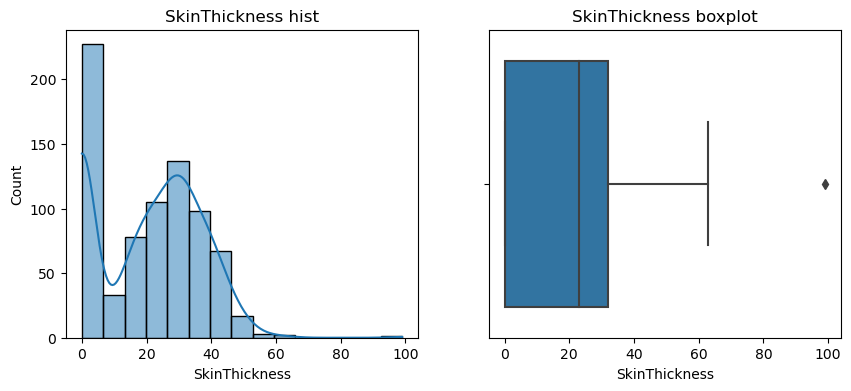

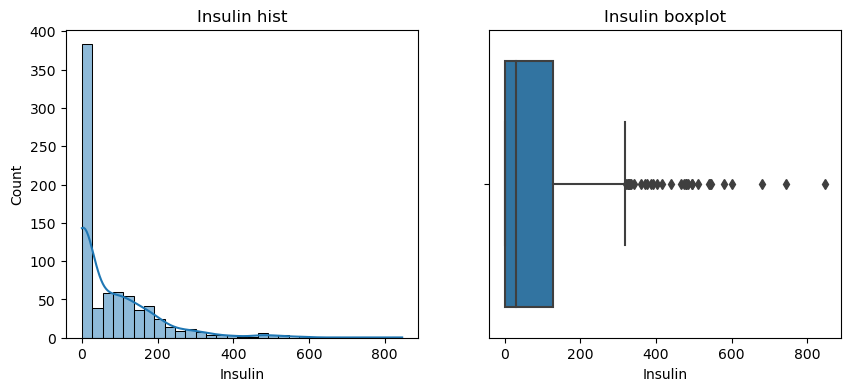

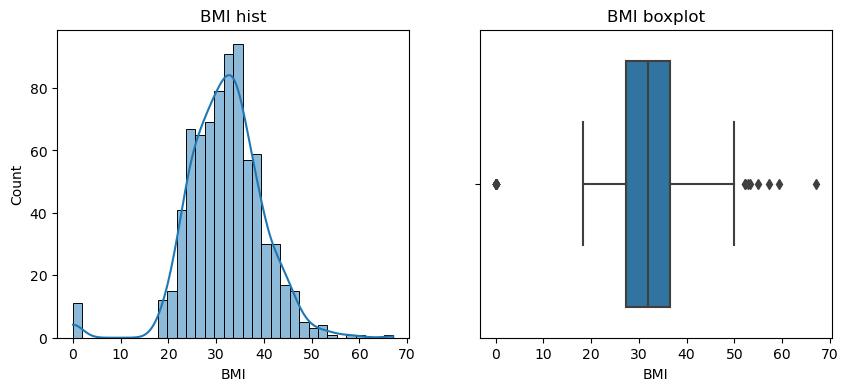

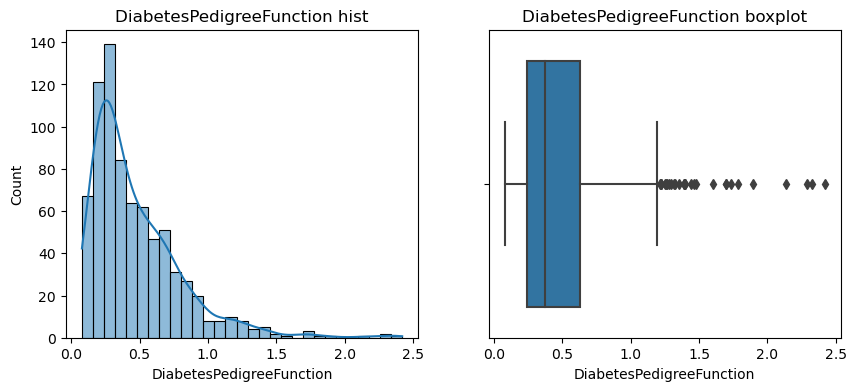

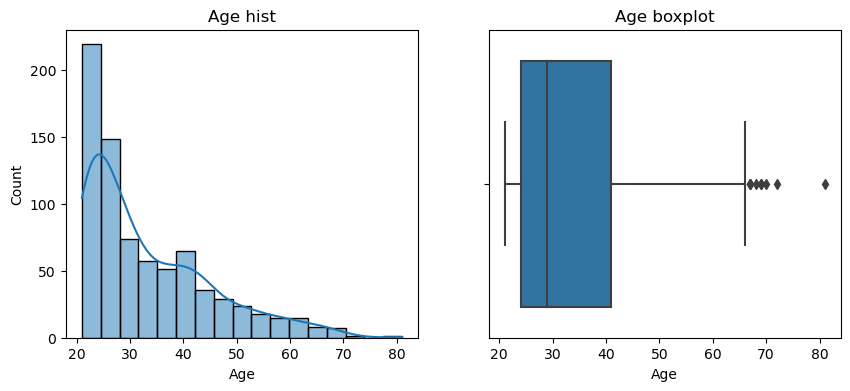

In [64]:
for col in var_ind:
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.title(col+" hist")
    
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.title(col+" boxplot")
    
    plt.show()

### Descripción de las variables independientes
#### El total de las mujeres presenta: 
* #### Promedio de 3 embarazos
* #### Promedio de glucosa en sangre de 120.
* #### Promedio de presión arterial de 69.
* #### Promedio de insulina de 79.
* #### Promedio del indice de masa corporal de 32.
* #### Edad promedio de 33 años.

> ## Construcción del modelo.

### Selección de rasgos

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

In [66]:
X = data[var_ind]
Y = data["Outcome"]

In [67]:
lr = LogisticRegression(solver="liblinear")

In [68]:
rfe = RFE(lr, n_features_to_select=5)
rfe = rfe.fit(X,Y.values.ravel())

In [69]:
rfe.support_

array([ True,  True,  True, False, False,  True,  True, False])

In [70]:
var_sel = pd.DataFrame(list(zip(X,rfe.support_,rfe.ranking_)))
var_sel

,0,1,2
0,Pregnancies,True,1
1,Glucose,True,1
2,BloodPressure,True,1
3,SkinThickness,False,3
4,Insulin,False,4
5,BMI,True,1
6,DiabetesPedigreeFunction,True,1
7,Age,False,2


In [71]:
features_select = ["Glucose","BMI", "BloodPressure",
                  "Pregnancies","DiabetesPedigreeFunction"]
X_new = data[features_select]
X_new

,Glucose,BMI,BloodPressure,Pregnancies,DiabetesPedigreeFunction
0,148,33.6,72,6,0.627
1,85,26.6,66,1,0.351
2,183,23.3,64,8,0.672
3,89,28.1,66,1,0.167
4,137,43.1,40,0,2.288
...,...,...,...,...,...
763,101,32.9,76,10,0.171
764,122,36.8,70,2,0.340
765,121,26.2,72,5,0.245
766,126,30.1,60,1,0.349


### División de datos en datos de entrenamiento y datos de prueba.

In [72]:
x_train, x_test, y_train, y_test = train_test_split(X_new,Y,
                                                    test_size=0.3,
                                                    random_state=0)

In [73]:
lr = LogisticRegression(solver="liblinear")
lr.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

> ## Evaluación del modelo.

In [74]:
lr.score(x_test,y_test)

0.7922077922077922

In [75]:
probs = lr.predict_proba(x_test)

In [76]:
prediction = lr.predict(x_test)
prediction

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0])

#### Si la probabilidad de tener diabetes está entre 0 y 0.5 indicamos que no tiene, pero si está entre 0.5 y 1 indicamos que si tiene diabetes.

In [77]:
prob = probs[:,1]
threshold = 0.5
prob_df = pd.DataFrame(prob)
prob_df["prediction"] = np.where(prob_df[0]>threshold,1,0)
prob_df["actual"] = list(y_test)
prob_df.head()

,0,prediction,actual
0,0.888080,1,1
1,0.221598,0,0
2,0.158604,0,0
3,0.579869,1,1
4,0.169647,0,0


In [78]:
prob_df["prediction"].value_counts()

0    179
1     52
Name: prediction, dtype: int64

In [79]:
print("Probabilidad de tener diabetes: "+str((52/len(prob_df))*100)+" %" )

Probabilidad de tener diabetes: 22.51082251082251 %


In [80]:
from sklearn import metrics

In [81]:
print("El "+str(metrics.accuracy_score(y_test, prediction)*100)+" % de los casos coinciden")

El 79.22077922077922 % de los casos coinciden


### Validación cruzada.

In [82]:
from sklearn.model_selection import cross_val_score

In [83]:
scores = cross_val_score(LogisticRegression(),
                        X_new, Y,
                        scoring="accuracy",
                        cv=10)

In [84]:
scores

array([0.74025974, 0.76623377, 0.79220779, 0.71428571, 0.76623377,
       0.77922078, 0.79220779, 0.80519481, 0.72368421, 0.80263158])

In [85]:
scores.mean()

0.7682159945317839

* #### La validación cruzada mucho no cambia respecto a la validación anterior.

### Matrices de confusión y curvas ROC

In [86]:
confusion_matrix = pd.crosstab(prob_df["prediction"],
                              prob_df["actual"])
confusion_matrix

actual,0,1
prediction,,
0,144,35
1,13,39


In [87]:
TN = confusion_matrix[0][0]
TP = confusion_matrix[1][1]
FN = confusion_matrix[1][0]
FP = confusion_matrix[0][1]
TN,TP,FN,FP

(144, 39, 35, 13)

In [88]:
sens = TP/(TP+FN)
sens

0.527027027027027

In [89]:
espec_1 = 1-(TN/(TN+FP))
espec_1

0.08280254777070062

In [90]:
threshold = [0.04, 0.05, 0.08, 0.10, 0.12, 0.18, 0.20, 0.25, 0.30, 0.40]
sensitivities = [1]
especifities_1 = [1]

for t in threshold:
    prob_df["prediction"] = np.where(prob_df[0]>=t,1,0)
    prob_df["actual"] = list(y_test)
    
    confusion_matrix = pd.crosstab(prob_df["prediction"],
                                  prob_df["actual"])
    
    TN = confusion_matrix[0][0]
    TP = confusion_matrix[1][1]
    FN = confusion_matrix[1][0]
    FP = confusion_matrix[0][1]
    
    sens = TP/(TP+FN)
    sensitivities.append(sens)
    espec_1 = 1-(TN/(TN+FP))
    especifities_1.append(espec_1)
    
sensitivities.append(0)
especifities_1.append(0)

In [91]:
sensitivities

[1,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9864864864864865,
 0.972972972972973,
 0.9324324324324325,
 0.8513513513513513,
 0.6486486486486487,
 0]

In [92]:
especifities_1

[1,
 0.9872611464968153,
 0.9872611464968153,
 0.9554140127388535,
 0.910828025477707,
 0.8662420382165605,
 0.6878980891719746,
 0.5859872611464968,
 0.4267515923566879,
 0.3312101910828026,
 0.1847133757961783,
 0]

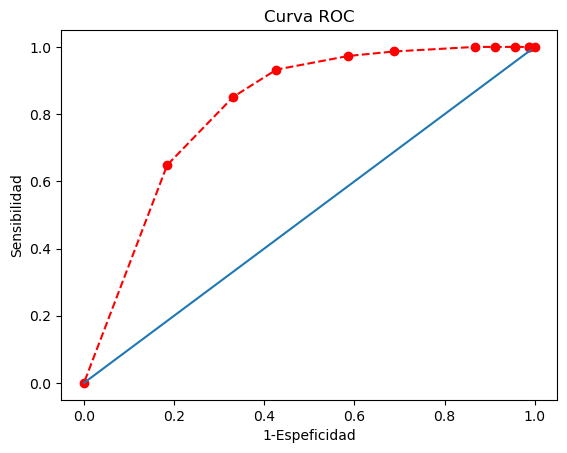

In [93]:
plt.plot(especifities_1,sensitivities,marker="o",
        linestyle="--",color="r")
x = [i*0.01 for i in range(100)]
y = [i*0.01 for i in range(100)]
plt.plot(x,y)
plt.xlabel("1-Espeficidad")
plt.ylabel("Sensibilidad")
plt.title("Curva ROC")
plt.show()